In [1]:
#import the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import folium
import statsmodels.api as sm
import scipy.stats
import numpy as np
from math import sqrt
import statsmodels.formula.api as smf
from tabulate import tabulate

In [2]:
#set up the metric calculations
def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

In [3]:
london_flows = pd.read_csv("london_flows.csv")
london_flows = london_flows.drop(london_flows[london_flows['station_origin'] == 'Battersea Park'].index)
london_flows = london_flows.drop(london_flows[london_flows['station_destination'] == 'Battersea Park'].index)
london_flows = london_flows[london_flows['distance'] != 0]
london_flows.head()

,station_origin,station_destination,flows,population,jobs,distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097
1,Abbey Road,Beckton,1,599,442,8510.121774
2,Abbey Road,Blackwall,3,599,665,3775.448872
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220
4,Abbey Road,Canning Town,37,599,15428,2228.923167


In [4]:
london_flowsmat = london_flows.pivot_table(values ="flows", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,599
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,1224
Acton Town,NaN,NaN,NaN,3.0,17.0,NaN,35.0,0.0,NaN,11.0,...,77.0,3.0,6.0,9.0,NaN,0.0,NaN,0.0,NaN,3745
Aldgate,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,17.0,...,0.0,NaN,4.0,8.0,NaN,0.0,NaN,0.0,NaN,2886
Aldgate East,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,NaN,20.0,...,24.0,0.0,0.0,12.0,NaN,1.0,NaN,1.0,NaN,3172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,2.0,5.0,47.0,NaN,NaN,NaN,NaN,22.0,...,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4868
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530
Woodside Park,NaN,NaN,1.0,26.0,11.0,NaN,0.0,NaN,NaN,59.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,3093


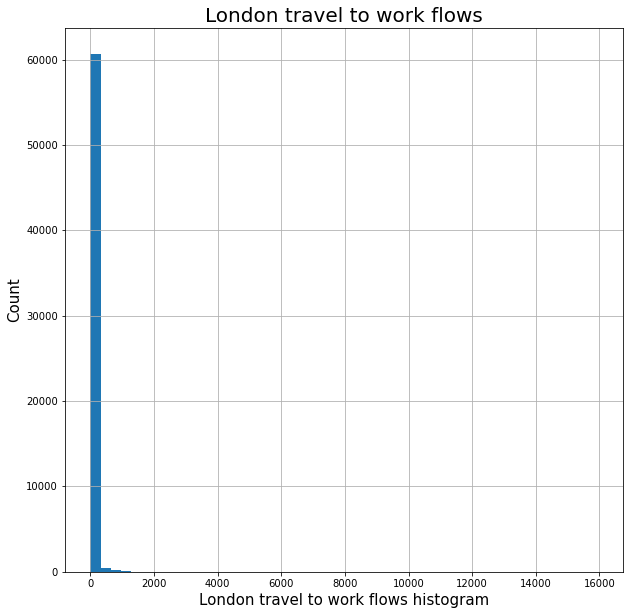

In [5]:
plt.subplots(figsize=(10,10))

plt.hist(london_flows["flows"], histtype="stepfilled" , bins = 50)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

In [6]:
#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "distance"]
log_x_vars = []
for x in x_variables:
    london_flows[f"log_{x}"] = np.log(london_flows[x])
    log_x_vars.append(f"log_{x}")
london_flows

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274
...,...,...,...,...,...,...,...,...,...
61469,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144
61470,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245
61471,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905
61472,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832


# model

In [7]:
#create the formula (the "-1" indicates no intercept in the regression model).
formula = 'flows ~ station_origin + log_jobs + log_distance-1'
#run a production constrained simulation
prodSim = smf.glm(formula = formula, data=london_flows, family=sm.families.Poisson()).fit()
#let's have a look at it's summary
print(prodSim.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  flows   No. Observations:                61413
Model:                            GLM   Df Residuals:                    61013
Model Family:                 Poisson   Df Model:                          399
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.0169e+06
Date:                Tue, 02 May 2023   Deviance:                   1.8615e+06
Time:                        01:08:08   Pearson chi2:                 2.78e+06
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [8]:
#create some Oi and Dj columns in the dataframe and store row and column totals in them:
#to create O_i, take cdatasub ...then... group by origcodenew ...then... summarise by calculating the sum of Total
O_i = pd.DataFrame(london_flows.groupby(["station_origin"])["flows"].agg(np.sum))
O_i.rename(columns={"flows":"O_i"}, inplace = True)
london_flows = london_flows.merge(O_i, on = "station_origin", how = "left" )

D_j = pd.DataFrame(london_flows.groupby(["station_destination"])["flows"].agg(np.sum))
D_j.rename(columns={"flows":"D_j"}, inplace = True)
london_flows = london_flows.merge(D_j, on = "station_destination", how = "left" )

In [9]:
#We can do this by pulling out the parameter values
coefs = pd.DataFrame(prodSim.params)
coefs.reset_index(inplace=True)
coefs.rename(columns = {0:"alpha_i", "index":"coef"}, inplace = True)
to_repl = ["(station_origin)", "\[", "\]"]
for x in to_repl:
    coefs["coef"] = coefs["coef"].str.replace(x, "")
#then once you have done this you can join them back into the dataframes
london_flows = london_flows.merge(coefs, left_on="station_origin", right_on="coef", how = "left")
london_flows.drop(columns = ["coef"], inplace = True)
#check this has worked
london_flows

/tmp/ipykernel_96/3727135127.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  coefs["coef"] = coefs["coef"].str.replace(x, "")


,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242
...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,3342,6.905590
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,5487,6.905590
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,400,6.905590
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,893,6.905590


In [10]:
coefs.head()

,coef,alpha_i
0,Abbey Road,3.250242
1,Acton Central,5.016902
2,Acton Town,4.562892
3,Aldgate,3.323767
4,Aldgate East,3.457664


In [11]:
alpha_i = prodSim.params[0:-2]
gamma = prodSim.params[-2]
beta = -prodSim.params[-1]

In [12]:
alpha_i

station_origin[Abbey Road]          3.250242
station_origin[Acton Central]       5.016902
station_origin[Acton Town]          4.562892
station_origin[Aldgate]             3.323767
station_origin[Aldgate East]        3.457664
                                      ...   
station_origin[Wood Street]         5.242024
station_origin[Woodford]            5.160643
station_origin[Woodgrange Park]     5.254667
station_origin[Woodside Park]       4.698635
station_origin[Woolwich Arsenal]    6.905590
Length: 398, dtype: float64

In [13]:
gamma

0.7686156200124424

In [14]:
beta

0.8781191183724336

\begin{equation} \tag{14}
\lambda_{ij} = \exp (\alpha_i + \gamma_j -\beta \ln d_{ij})
\end{equation}

In [15]:
london_flows["prodsimest1"] = np.exp(london_flows["alpha_i"]+gamma*london_flows["log_jobs"] 
                                 - beta*london_flows["log_distance"])
#or you could do it the easy way like we did last week with the fitted column (See previous practical)
london_flows.head(5)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242,55.010681
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242,0.986106
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242,2.755640
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242,66.457296
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242,49.060970


In [16]:
london_flows["prodsimest1"] = round(london_flows["prodsimest1"],0)
#now we can create a pivot tabel to turn the paired list into a matrix, and compute the margins as well
london_flowsmat2 = london_flows.pivot_table(values ="prodsimest1", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat2

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3749.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2882.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [17]:
CalcRSqaured(london_flows["flows"], london_flows["prodsimest1"])

0.3882763950178627

In [18]:
CalcRMSE(london_flows["flows"], london_flows["prodsimest1"])

102.893

# senario

## Canary Wharf has a 50% decrease in jobs 

In [19]:
def new_job(row):
    if row["station_destination"] == "Canary Wharf":
        val = 58772/2
    else:
        val = row["jobs"]
    return val
        
london_flows["ScenarioA"] = london_flows.apply(new_job, axis =1)
london_flows.head(10)

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,D_j,alpha_i,prodsimest1,ScenarioA
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,78549,3.250242,55.0,78549.0
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,442,3.250242,1.0,442.0
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,665,3.250242,3.0,665.0
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,58772,3.250242,66.0,29386.0
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,15428,3.250242,49.0,15428.0
5,Abbey Road,Crossharbour,1,599,1208,6686.475560,6.395262,7.096721,8.807842,599,1208,3.250242,3.0,1208.0
6,Abbey Road,Custom House,0,599,845,3824.855630,6.395262,6.739337,8.249276,599,845,3.250242,3.0,845.0
7,Abbey Road,Cutty Sark,2,599,1748,8503.898909,6.395262,7.466228,9.048280,599,1748,3.250242,3.0,1748.0
8,Abbey Road,Cyprus,7,599,850,6532.099618,6.395262,6.745236,8.784484,599,850,3.250242,2.0,850.0
9,Abbey Road,Devons Road,1,599,611,3958.324171,6.395262,6.415097,8.283576,599,611,3.250242,2.0,611.0


\begin{equation} \tag{14}
\lambda_{ij} = \exp (\alpha_i + \gamma_j -\beta \ln d_{ij})
\end{equation}

In [20]:
london_flows["prodsimest2"] = np.exp(london_flows["alpha_i"]+gamma*np.log(london_flows["ScenarioA"]) - beta*london_flows["log_distance"])

london_flows["prodsimest2"] = round(london_flows["prodsimest2"],0)
#now we can convert the pivot table into a matrix
london_flowsmat3 = london_flows.pivot_table(values ="prodsimest2", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat3

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,572.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,16.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3719.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,21.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2859.0
Aldgate East,NaN,NaN,2.0,52.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,35.0,39.0,NaN,NaN,NaN,NaN,32.0,...,15.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4790.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3060.0


In [21]:
#calculate some new wj^alpha and d_ij^beta values
Dj2_gamma = london_flows["jobs"]**gamma
dist_beta = london_flows["distance"]**-beta
#calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [22]:
#to check everything works, recreate the original estimates
london_flows["prodsimest3"] = london_flows["A_i"]*london_flows["O_i"]*Dj2_gamma*dist_beta
#round
london_flows["prodsimest3"] = round(london_flows["prodsimest3"])
#check
london_flows[["prodsimest1", "prodsimest3"]]

,prodsimest1,prodsimest3
0,55.0,55.0
1,1.0,1.0
2,3.0,3.0
3,66.0,66.0
4,49.0,49.0
...,...,...
61408,121.0,121.0
61409,259.0,259.0
61410,32.0,32.0
61411,98.0,98.0


In [23]:
#calculate some new wj^alpha and d_ij^beta values
Dj3_gamma = london_flows["ScenarioA"]**gamma
#calcualte the first stage of the Ai values
london_flows["Ai1"] = Dj3_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai1"].agg(np.sum))
#now divide into 1
A_i["Ai1"] = 1/A_i["Ai1"]
A_i.rename(columns={"Ai1":"A_i2"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [24]:
#to check everything works, recreate the original estimates
london_flows["prodsimest4"] = london_flows["A_i2"]*london_flows["O_i"]*Dj3_gamma*dist_beta
#round
london_flows["prodsimest4"] = round(london_flows["prodsimest4"])

In [25]:
london_flowsmat4 = london_flows.pivot_table(values ="prodsimest4", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat4

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,600.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1223.0
Acton Town,NaN,NaN,NaN,18.0,18.0,NaN,9.0,1.0,NaN,20.0,...,17.0,3.0,5.0,13.0,NaN,2.0,NaN,2.0,NaN,3745.0
Aldgate,NaN,NaN,2.0,NaN,47.0,NaN,NaN,0.0,NaN,22.0,...,4.0,NaN,3.0,2.0,NaN,1.0,NaN,1.0,NaN,2884.0
Aldgate East,NaN,NaN,2.0,53.0,NaN,NaN,1.0,0.0,NaN,23.0,...,5.0,1.0,3.0,2.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,7.0,36.0,39.0,NaN,NaN,NaN,NaN,33.0,...,16.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,4863.0
Woodgrange Park,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0
Woodside Park,NaN,NaN,5.0,21.0,21.0,NaN,2.0,NaN,NaN,25.0,...,11.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3091.0


In [26]:
london_flowsmat4.fillna(0, inplace=True)
london_flowsmat4 = london_flowsmat4.astype(int)
#london_flowsmat4.to_csv('outputs/OD_matrixA.csv')

##  a significant increase in the cost of transport beta1=beta+0.3

\begin{equation} \label{eq:1} \tag{1}
T_{ij} = A_i O_i D_j^\gamma d_{ij}^{-\beta}
\end{equation}

Where

\begin{equation} \label{eq:2} \tag{2}
O_i = \sum_j T_{ij}
\end{equation}

and

\begin{equation} \label{eq:3} \tag{3}
A_i = \frac{1}{\sum_j D_j^\gamma d_{ij}^{-\beta}}
\end{equation}


In [27]:
beta1=beta+0.3
beta1

1.1781191183724335

\begin{equation} \tag{14}
\lambda_{ij} = \exp (\alpha_i + \gamma_j -\beta \ln d_{ij})
\end{equation}

In [28]:
london_flows["prodsimest5"] = np.exp(london_flows["alpha_i"]+gamma*np.log(london_flows["jobs"]) - beta1*london_flows["log_distance"])

london_flows["prodsimest5"] = round(london_flows["prodsimest5"],0)
#now we can convert the pivot table into a matrix
london_flowsmat5 = london_flows.pivot_table(values ="prodsimest5", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat5

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,61.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,79.0
Acton Town,NaN,NaN,NaN,1.0,1.0,NaN,1.0,0.0,NaN,1.0,...,1.0,0.0,0.0,1.0,NaN,0.0,NaN,0.0,NaN,225.0
Aldgate,NaN,NaN,0.0,NaN,5.0,NaN,NaN,0.0,NaN,2.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,258.0
Aldgate East,NaN,NaN,0.0,6.0,NaN,NaN,0.0,0.0,NaN,2.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,2.0,2.0,NaN,NaN,NaN,NaN,2.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,252.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
Woodside Park,NaN,NaN,0.0,1.0,1.0,NaN,0.0,NaN,NaN,1.0,...,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,159.0


In [29]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta = london_flows["distance"]**-beta1
#calcualte the first stage of the Ai values
london_flows["Ai2"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai2"].agg(np.sum))
#now divide into 1
A_i["Ai2"] = 1/A_i["Ai2"]
A_i.rename(columns={"Ai2":"A_i3"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [30]:
london_flows

,station_origin,station_destination,flows,population,jobs,distance,log_population,log_jobs,log_distance,O_i,...,ScenarioA,prodsimest2,Ai1,A_i,prodsimest3,A_i2,prodsimest4,prodsimest5,Ai2,A_i3
0,Abbey Road,Bank and Monument,0,599,78549,8131.525097,6.395262,11.271478,9.003504,599,...,78549.0,55.0,2.132479,0.043066,55.0,0.045134,58.0,4.0,0.143164,0.404534
1,Abbey Road,Beckton,1,599,442,8510.121774,6.395262,6.091310,9.049012,599,...,442.0,1.0,0.038226,0.043066,1.0,0.045134,1.0,0.0,0.002532,0.404534
2,Abbey Road,Blackwall,3,599,665,3775.448872,6.395262,6.499787,8.236275,599,...,665.0,3.0,0.106822,0.043066,3.0,0.045134,3.0,0.0,0.009028,0.404534
3,Abbey Road,Canary Wharf,1,599,58772,5086.514220,6.395262,10.981421,8.534348,599,...,29386.0,39.0,1.512182,0.043066,66.0,0.045134,41.0,5.0,0.199092,0.404534
4,Abbey Road,Canning Town,37,599,15428,2228.923167,6.395262,9.643939,7.709274,599,...,15428.0,49.0,1.901840,0.043066,49.0,0.045134,51.0,5.0,0.188254,0.404534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61408,Woolwich Arsenal,Tower Gateway,127,7892,3342,13401.795549,8.973605,8.114325,9.503144,7892,...,3342.0,121.0,0.121469,0.126437,121.0,0.136719,131.0,7.0,0.007020,1.962405
61409,Woolwich Arsenal,West Ham,608,7892,5487,8701.454361,8.973605,8.610137,9.071245,7892,...,5487.0,259.0,0.259825,0.126437,259.0,0.136719,280.0,17.0,0.017092,1.962405
61410,Woolwich Arsenal,West India Quay,6,7892,400,9536.720451,8.973605,5.991465,9.162905,7892,...,400.0,32.0,0.032033,0.126437,32.0,0.136719,35.0,2.0,0.002050,1.962405
61411,Woolwich Arsenal,West Silvertown,81,7892,893,5355.248554,8.973605,6.794587,8.585832,7892,...,893.0,98.0,0.098573,0.126437,98.0,0.136719,106.0,7.0,0.007501,1.962405


In [31]:
#to check everything works, recreate the original estimates
london_flows["prodsimest6"] = london_flows["A_i3"]*london_flows["O_i"]*Dj2_gamma*dist_beta
#round
london_flows["prodsimest6"] = round(london_flows["prodsimest6"])

london_flowsmat6 = london_flows.pivot_table(values ="prodsimest6", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat6

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,601.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1220.0
Acton Town,NaN,NaN,NaN,16.0,16.0,NaN,11.0,0.0,NaN,17.0,...,14.0,3.0,4.0,14.0,NaN,1.0,NaN,2.0,NaN,3742.0
Aldgate,NaN,NaN,1.0,NaN,55.0,NaN,NaN,0.0,NaN,19.0,...,2.0,NaN,2.0,1.0,NaN,1.0,NaN,0.0,NaN,2876.0
Aldgate East,NaN,NaN,1.0,65.0,NaN,NaN,0.0,0.0,NaN,21.0,...,3.0,0.0,2.0,1.0,NaN,1.0,NaN,1.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,6.0,35.0,40.0,NaN,NaN,NaN,NaN,31.0,...,12.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,4864.0
Woodgrange Park,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,5.0,20.0,20.0,NaN,2.0,NaN,NaN,25.0,...,9.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,3092.0


In [32]:
london_flowsmat6.fillna(0, inplace=True)
london_flowsmat6 = london_flowsmat6.astype(int)
#london_flowsmat6.to_csv('outputs/OD_matrixB1.csv')

##  a significant increase in the cost of transport beta1=beta+0.5

In [33]:
beta2=beta+0.5
beta2

1.3781191183724335

In [34]:
london_flows["prodsimest7"] = np.exp(london_flows["alpha_i"]+gamma*np.log(london_flows["jobs"]) - beta2*london_flows["log_distance"])

london_flows["prodsimest7"] = round(london_flows["prodsimest7"],0)
#now we can convert the pivot table into a matrix
london_flowsmat7 = london_flows.pivot_table(values ="prodsimest7", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat7

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,11.0
Acton Town,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,16.0
Aldgate,NaN,NaN,0.0,NaN,1.0,NaN,NaN,0.0,NaN,0.0,...,0.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,49.0
Aldgate East,NaN,NaN,0.0,1.0,NaN,NaN,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,22.0
Woodgrange Park,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
Woodside Park,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [35]:
#calculate some new wj^alpha and d_ij^beta values
dist_beta = london_flows["distance"]**-beta2
#calcualte the first stage of the Ai values
london_flows["Ai3"] = Dj2_gamma * dist_beta
#now do the sum over all js bit
A_i = pd.DataFrame(london_flows.groupby(["station_origin"])["Ai3"].agg(np.sum))
#now divide into 1
A_i["Ai3"] = 1/A_i["Ai3"]
A_i.rename(columns={"Ai3":"A_i4"}, inplace=True)
#and write the A_i values back into the dataframe
london_flows = london_flows.merge(A_i, left_on="station_origin", right_index=True, how="left")

In [36]:
#to check everything works, recreate the original estimates
london_flows["prodsimest8"] = london_flows["A_i4"]*london_flows["O_i"]*Dj2_gamma*dist_beta
#round
london_flows["prodsimest8"] = round(london_flows["prodsimest8"])

london_flowsmat8 = london_flows.pivot_table(values ="prodsimest8", index="station_origin", columns = "station_destination",
                            aggfunc=np.sum, margins=True)
london_flowsmat8

station_destination,Abbey Road,Acton Central,Acton Town,Aldgate,Aldgate East,All Saints,Alperton,Amersham,Anerley,Angel,...,Wimbledon,Wimbledon Park,Wood Green,Wood Lane,Wood Street,Woodford,Woodgrange Park,Woodside Park,Woolwich Arsenal,All
station_origin,,,,,,,,,,,,,,,,,,,,,
Abbey Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,599.0
Acton Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1224.0
Acton Town,NaN,NaN,NaN,14.0,14.0,NaN,12.0,0.0,NaN,16.0,...,13.0,2.0,3.0,15.0,NaN,1.0,NaN,1.0,NaN,3748.0
Aldgate,NaN,NaN,1.0,NaN,59.0,NaN,NaN,0.0,NaN,17.0,...,1.0,NaN,1.0,1.0,NaN,0.0,NaN,0.0,NaN,2872.0
Aldgate East,NaN,NaN,1.0,72.0,NaN,NaN,0.0,0.0,NaN,20.0,...,2.0,0.0,1.0,1.0,NaN,0.0,NaN,0.0,NaN,3166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Woodford,NaN,NaN,5.0,35.0,40.0,NaN,NaN,NaN,NaN,30.0,...,10.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,4866.0
Woodgrange Park,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,530.0
Woodside Park,NaN,NaN,4.0,19.0,19.0,NaN,1.0,NaN,NaN,25.0,...,8.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,3093.0


In [37]:
london_flowsmat8.fillna(0, inplace=True)
london_flowsmat8 = london_flowsmat8.astype(int)
#london_flowsmat8.to_csv('outputs/OD_matrixB2.csv')